In [104]:
#create reference for CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
#read CSV file into a dataframe
olympics_path = "resources/athlete_events.csv"

olympics_df = pd.read_csv(olympics_path, low_memory = False)

#print the first 5 rows
olympics_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [106]:
# use only the Summer Olympics for Analysis
summer_df = olympics_df[olympics_df['Season'] == 'Summer']

In [107]:
#Create variables for the specific host country
host_country = 'Great Britain'
host_NOC = 'GBR'
host_year = 2008

In [108]:
# create a dataframe for only the UK team in the Summer Olympics
host_df = summer_df[summer_df['NOC'] == host_NOC]

In [109]:
# create a dataframe for the UK team in the Summer Olympics grouped by Games. 
games_df_host = host_df.groupby('Games').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
games_df_host['gold_medals'] = host_df[host_df['Medal'] == 'Gold'].groupby('Games').agg({'Medal': ['count']})
games_df_host['silver_medals'] = host_df[host_df['Medal'] == 'Silver'].groupby('Games').agg({'Medal': ['count']})
games_df_host['bronze_medals'] = host_df[host_df['Medal'] == 'Bronze'].groupby('Games').agg({'Medal': ['count']})

# fill NaN values with 0
games_df_host = games_df_host.fillna(0)

# format values in all columns except Games to integers
games_df_host = games_df_host.astype(int)

games_df_host

,Medal,gold_medals,silver_medals,bronze_medals
,count,,,
Games,,,,
1896 Summer,9,3,3,3
1900 Summer,108,59,34,15
1904 Summer,2,1,1,0
1906 Summer,39,9,22,8
1908 Summer,368,147,131,90
1912 Summer,170,47,64,59
1920 Summer,111,52,42,17
1924 Summer,64,15,30,19


In [110]:
# Add a column for non-medal participations, which is the count of all rows for Games where Medal is NaN
games_df_host['non_medal_participations'] = host_df[host_df['Medal'].isnull()].groupby('Games').size()

# Add a column for total participations, which is the count of all rows for Games.
# This includes 0 or NaN values for medals
games_df_host['total_participations'] = host_df.groupby('Games').size()
games_df_host

,Medal,gold_medals,silver_medals,bronze_medals,non_medal_participations,total_participations
,count,,,,,
Games,,,,,,
1896 Summer,9,3,3,3,16,25
1900 Summer,108,59,34,15,38,146
1904 Summer,2,1,1,0,4,6
1906 Summer,39,9,22,8,74,113
1908 Summer,368,147,131,90,604,972
1912 Summer,170,47,64,59,291,461
1920 Summer,111,52,42,17,234,345
1924 Summer,64,15,30,19,364,428


In [111]:
#create new dataframe filtered by columns team, games, year, season, sport, event, medal, city
summer_games_df = summer_df[["Team", "Games", "Year", "Season", "Sport", "Event", "Medal", "City"]]

summer_games_df.head()

,Team,Games,Year,Season,Sport,Event,Medal,City
0,China,1992 Summer,1992,Summer,Basketball,Basketball Men's Basketball,NaN,Barcelona
1,China,2012 Summer,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,London
2,Denmark,1920 Summer,1920,Summer,Football,Football Men's Football,NaN,Antwerpen
3,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Paris
26,Netherlands,1932 Summer,1932,Summer,Athletics,Athletics Women's 100 metres,NaN,Los Angeles


In [112]:
#Clean the Data
#Rename column team to country
summer_games_df = summer_games_df.rename(columns = {"Team": "Country"})
#Rename city to host 
summer_games_df = summer_games_df.rename(columns = {"City": "Host"})

#Filter to the Host Year
summer_games_df = summer_games_df[summer_games_df["Year"] == host_year]

summer_games_df.head()

,Country,Games,Year,Season,Sport,Event,Medal,Host
79,Norway,2008 Summer,2008,Summer,Handball,Handball Women's Handball,Gold,Beijing
136,Estonia,2008 Summer,2008,Summer,Athletics,Athletics Women's Javelin Throw,NaN,Beijing
159,Spain,2008 Summer,2008,Summer,Fencing,"Fencing Men's epee, Individual",Bronze,Beijing
163,Russia,2008 Summer,2008,Summer,Athletics,Athletics Women's Javelin Throw,Silver,Beijing
167,Spain,2008 Summer,2008,Summer,Basketball,Basketball Women's Basketball,NaN,Beijing


In [113]:
#Drop Unnecessary Columns
summer_games_metals_df = summer_games_df.drop(columns = ["Games", "Sport", "Event"])

summer_games_metals_df

,Country,Year,Season,Medal,Host
79,Norway,2008,Summer,Gold,Beijing
136,Estonia,2008,Summer,NaN,Beijing
159,Spain,2008,Summer,Bronze,Beijing
163,Russia,2008,Summer,Silver,Beijing
167,Spain,2008,Summer,NaN,Beijing
...,...,...,...,...,...
270986,Russia,2008,Summer,Bronze,Beijing
270987,Russia-2,2008,Summer,NaN,Beijing
271022,Germany,2008,Summer,NaN,Beijing
271026,Germany,2008,Summer,NaN,Beijing


In [114]:
#create a new dataframe thatn removes all rows that have an Na in the medal column
host_year_medals_df = summer_games_metals_df.dropna(subset = ["Medal"]) 

host_year_medals_df

,Country,Year,Season,Medal,Host
79,Norway,2008,Summer,Gold,Beijing
159,Spain,2008,Summer,Bronze,Beijing
163,Russia,2008,Summer,Silver,Beijing
172,Belarus,2008,Summer,Gold,Beijing
173,France,2008,Summer,Gold,Beijing
...,...,...,...,...,...
270564,Digby,2008,Summer,Bronze,Beijing
270589,Israel,2008,Summer,Bronze,Beijing
270594,Croatia,2008,Summer,Bronze,Beijing
270934,Russia,2008,Summer,Gold,Beijing


In [115]:
#create new columns for "Gold" medals, "Silver" medals, "Bronze" medals, and "Total Medals"
host_year_medal_countrys_df = host_year_medals_df.groupby('Country').agg({'Medal': ['count']})

# Add columns for gold_medals, silver_medals, bronze_medals and total_medals
host_year_medal_countrys_df['Gold'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Gold'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Silver'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Silver'].groupby('Country').agg({'Medal': ['count']})
host_year_medal_countrys_df['Bronze'] = host_year_medals_df[host_year_medals_df['Medal'] == 'Bronze'].groupby('Country').agg({'Medal': ['count']})

# fill NaN values with 0
host_year_medal_countrys_df = host_year_medal_countrys_df.fillna(0)

# format values in all columns except Games to integers
host_year_medal_countrys_df = host_year_medal_countrys_df.astype(int)

host_year_medal_countrys_df

,Medal,Gold,Silver,Bronze
,count,,,
Country,,,,
Afghanistan,1,0,0,1
Algeria,2,0,1,1
Argentina,51,20,0,31
Armenia,6,0,0,6
Australia,149,31,42,76
...,...,...,...,...
United States-2,2,2,0,0
Uzbekistan,6,1,2,3


In [116]:
#View values in the Country index
host_year_medal_countrys_df.index

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Belarus', 'Belgium',
       ...
       'Tunisia', 'Turkey', 'Ukraine', 'United States', 'United States-1',
       'United States-2', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zimbabwe'],
      dtype='object', name='Country', length=105)

In [117]:
## Sort the DataFrame by 'Host' (UK first) and then by total medals in descending order
# Sort dataframe by total medal count
host_year_sorted = host_year_medal_countrys_df.iloc[host_year_medal_countrys_df.iloc[:-1].sum(axis=1).argsort()[::-1]]

# Move Great Britain row to the top
host_row = host_year_sorted.loc[host_country]
df_sorted = host_year_sorted.drop(host_country)
host_year_sorted = pd.concat([host_row.to_frame().transpose(), host_year_sorted])

host_year_sorted.head(10)

,Medal,Gold,Silver,Bronze
,count,,,
Great Britain,81,31,25,25
United States,309,121,110,78
China,170,72,49,49
Australia,149,31,42,76
Russia,142,43,46,53
Germany,96,39,16,41
Great Britain,81,31,25,25
France,77,25,24,28
Brazil,74,14,32,28


In [118]:
#Rename Medal, count column to Total Medals
host_year_sorted = host_year_sorted.rename(columns = {"Medal" : "Total Medals"})
host_year_sorted = host_year_sorted.rename(columns = {"count" : " "})

host_year_sorted.head(10)

,Total Medals,Gold,Silver,Bronze
,,,,
Great Britain,81,31,25,25
United States,309,121,110,78
China,170,72,49,49
Australia,149,31,42,76
Russia,142,43,46,53
Germany,96,39,16,41
Great Britain,81,31,25,25
France,77,25,24,28
Brazil,74,14,32,28


<Axes: >

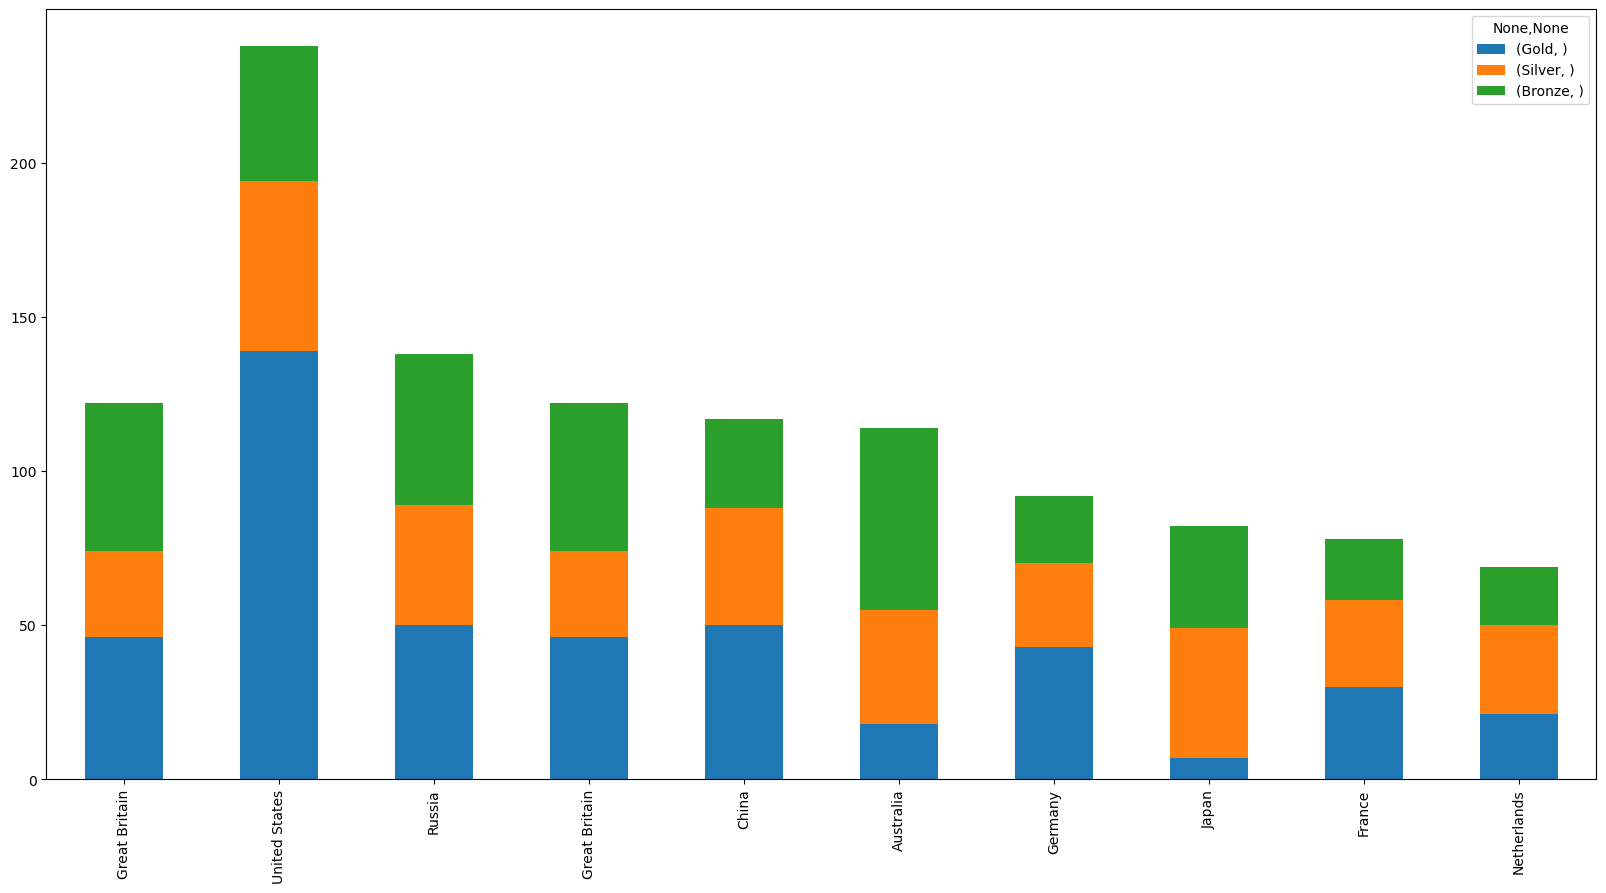

In [87]:
# Use a line chart to plot the medal count for the Chinese team in the Summer Olympics.
host_year_sorted.head(10)[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(20, 10))


** Normalizing the Team Sport Medal Counts **

In [88]:
#View all the values in the Sport column
summer_games_df['Event'].unique()

array(["Judo Men's Extra-Lightweight", "Athletics Men's 1,500 metres",
       "Boxing Men's Light-Welterweight",
       "Athletics Women's Javelin Throw", "Handball Men's Handball",
       "Rowing Women's Coxless Pairs",
       "Athletics Men's 110 metres Hurdles", "Boxing Men's Welterweight",
       "Hockey Men's Hockey", "Rowing Women's Single Sculls",
       "Water Polo Women's Water Polo",
       "Wrestling Men's Heavyweight, Greco-Roman",
       "Synchronized Swimming Women's Team",
       "Weightlifting Men's Middleweight",
       "Weightlifting Men's Light-Heavyweight",
       "Wrestling Men's Lightweight, Greco-Roman",
       "Athletics Men's Javelin Throw", "Volleyball Women's Volleyball",
       "Wrestling Men's Welterweight, Greco-Roman",
       "Athletics Men's 3,000 metres Steeplechase",
       "Athletics Men's Marathon", "Boxing Men's Lightweight",
       "Athletics Women's 100 metres", "Fencing Women's epee, Individual",
       "Wrestling Men's Super-Heavyweight, Greco-R

In [89]:
#Combine values in the Event column into a single row by Country (Exmample all 'Football Men's Football' should be on the same row for each country)
combined_events_df = summer_games_df.dropna(subset = ["Medal"]) 

combined_events_df


,Country,Games,Year,Season,Sport,Event,Medal,Host
174,France,2012 Summer,2012,Summer,Handball,Handball Men's Handball,Gold,London
684,Canada,2012 Summer,2012,Summer,Diving,Diving Women's Synchronized Springboard,Bronze,London
789,Russia,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Floor Exercise,Bronze,London
790,Russia,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Horse Vault,Silver,London
861,Egypt,2012 Summer,2012,Summer,Fencing,"Fencing Men's Foil, Individual",Silver,London
...,...,...,...,...,...,...,...,...
270434,China,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold,London
270435,China,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Floor Exercise,Gold,London
270436,China,2012 Summer,2012,Summer,Gymnastics,Gymnastics Men's Horizontal Bar,Bronze,London
270440,China,2012 Summer,2012,Summer,Boxing,Boxing Men's Light-Flyweight,Gold,London


In [ ]:
combined_events_df = combined_events_df.groupby(['Country', 'Year', 'Season', 'Sport', 'Medal', 'Host'])['Event'].apply(', '.join).reset_index()

combined_events_df.tail(25)